In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DegreeVsIncome_filename = "DegreeVsIncome.xlsx"
dvi = pd.read_excel(DegreeVsIncome_filename)

In [3]:
for title in dvi: print(title)

ID
Start time
Completion time
Email
Name
What year in school are you?
To which gender do you most identify?
What is your major?
Why did you choose your major?  List your top three reasons.
What factors helped you to choose EIU?
Do you work during the school year, specifically, to help pay for tuition?
List any other financial support.
What kinds of things are you looking for in your future jobs?
What are the most important qualities you look for in your future job?  Rank your selections.
What kind of salary do you expect for your first job after graduation?
What kind of salary do you expect mid-career?
How much of a factor does salary play into your major/career choice?
Major Category
Starting Salary (Normalized)
Mid-Career Salary (Normalized)
Why did you choose your major? (Normalized)


In [4]:
# Constants for survey questions to index dataframe with
# Ex) dvi[YEAR] would be all of the year responses
YEAR = "What year in school are you?"
GENDER = "To which gender do you most identify?"
MAJOR = "What is your major?"
MAJOR_CHOICE = "Why did you choose your major? (Normalized)"
WORK = "Do you work during the school year, specifically, to help pay for tuition?"
FINANCIAL_SUPPORT = "List any other financial support."
JOB_QUALITIES_FR = "What kinds of things are you looking for in your future jobs?" #Job Qualities Free-Response
JOB_QUALITIES_RANKED = "What are the most important qualities you look for in your future job?  Rank your selections."
STARTING_SALARY = "Starting Salary (Normalized)"
MID_CAREER_SALARY = "Mid-Career Salary (Normalized)"
SALARY_FACTOR = "How much of a factor does salary play into your major/career choice?"
MAJOR_CATEGORY = "Major Category"

In [5]:
NUMBER_OF_RESPONSES = len(dvi[YEAR]) # Number of responses - It's 114, but I again felt bad hardcoding

In [34]:
EIU_COLORS = [
    "#004C97", # EIU Blue
    "#6AD1E3", # EIU Accent/Light Blue
    "#75787B", # EIU Gray
]

In [6]:
NUMBER_OF_QUALITIES = dvi[JOB_QUALITIES_RANKED][0].count(";") # It's 8, but I feel bad hard-coding it

# Create empty dictionaries to hold scores
# Main dictionary that records the count for each score position
ranked_qualities_dict = {}
# Dictionary that records score (8: 1st Pick, 1: Last Pick) for each quality
ranked_qualities_score_dict = {}

# Fill dictionary with an empty list for each quality
for quality in dvi[JOB_QUALITIES_RANKED][0].split(";")[:-1]: #[:-1] to ignore the "" at the end
    ranked_qualities_score_dict[quality.strip()] = 0
    ranked_qualities_dict[quality.strip()] = [0] * NUMBER_OF_QUALITIES

print("Empty dictionaries:")
print(ranked_qualities_dict)
print(ranked_qualities_score_dict)

# Count placement for each quantity
for response in dvi[JOB_QUALITIES_RANKED]:
    for rank, quality in enumerate(response.split(";")[:-1]):
        ranked_qualities_score_dict[quality.strip()] += (8 - rank)
        ranked_qualities_dict[quality.strip()][rank] += 1

print("\n" + "Filled dictionaries:")
print(ranked_qualities_dict)
print(ranked_qualities_score_dict)

Empty dictionaries:
{'Opportunity for remote work': [0, 0, 0, 0, 0, 0, 0, 0], 'Salary': [0, 0, 0, 0, 0, 0, 0, 0], 'Opportunity for growth': [0, 0, 0, 0, 0, 0, 0, 0], 'Benefits': [0, 0, 0, 0, 0, 0, 0, 0], 'Job security': [0, 0, 0, 0, 0, 0, 0, 0], 'Work-Life balance': [0, 0, 0, 0, 0, 0, 0, 0], 'Working hours': [0, 0, 0, 0, 0, 0, 0, 0], 'Location': [0, 0, 0, 0, 0, 0, 0, 0]}
{'Opportunity for remote work': 0, 'Salary': 0, 'Opportunity for growth': 0, 'Benefits': 0, 'Job security': 0, 'Work-Life balance': 0, 'Working hours': 0, 'Location': 0}

Filled dictionaries:
{'Opportunity for remote work': [3, 7, 6, 3, 8, 3, 21, 63], 'Salary': [39, 30, 11, 11, 13, 5, 1, 4], 'Opportunity for growth': [9, 9, 16, 13, 13, 18, 17, 19], 'Benefits': [4, 21, 18, 26, 20, 19, 5, 1], 'Job security': [16, 11, 14, 20, 17, 15, 16, 5], 'Work-Life balance': [13, 19, 22, 15, 17, 14, 13, 1], 'Working hours': [5, 7, 18, 17, 17, 25, 22, 3], 'Location': [25, 10, 9, 9, 9, 15, 19, 18]}
{'Opportunity for remote work': 270, '

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

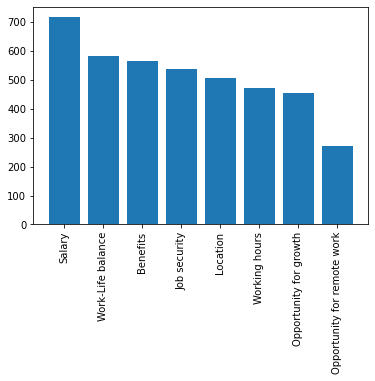

In [7]:
#Plot each quality by total points earned
lists = sorted(ranked_qualities_score_dict.items(), key=lambda item: item[1], reverse=True)
x, y = zip(*lists)
plt.bar(x, y)
plt.xticks(rotation=90)

In [8]:
#Create a dataframe from the ranked_qualities_dict data
ranked_qualities_df = pd.DataFrame(data=ranked_qualities_dict)
ranked_qualities_df = ranked_qualities_df.sort_values(0, axis=1, ascending=False)
ranked_qualities_df

,Salary,Location,Job security,Work-Life balance,Opportunity for growth,Working hours,Benefits,Opportunity for remote work
0,39,25,16,13,9,5,4,3
1,30,10,11,19,9,7,21,7
2,11,9,14,22,16,18,18,6
3,11,9,20,15,13,17,26,3
4,13,9,17,17,13,17,20,8
5,5,15,15,14,18,25,19,3
6,1,19,16,13,17,22,5,21
7,4,18,5,1,19,3,1,63


In [9]:
ranked_qualities_percentage_df = ranked_qualities_df.copy(deep=True)

ranked_qualities_percentage_df /= NUMBER_OF_RESPONSES # Make everything proportional

ranked_qualities_percentage_df

,Salary,Location,Job security,Work-Life balance,Opportunity for growth,Working hours,Benefits,Opportunity for remote work
0,0.342105,0.219298,0.140351,0.114035,0.078947,0.043860,0.035088,0.026316
1,0.263158,0.087719,0.096491,0.166667,0.078947,0.061404,0.184211,0.061404
2,0.096491,0.078947,0.122807,0.192982,0.140351,0.157895,0.157895,0.052632
3,0.096491,0.078947,0.175439,0.131579,0.114035,0.149123,0.228070,0.026316
4,0.114035,0.078947,0.149123,0.149123,0.114035,0.149123,0.175439,0.070175
5,0.043860,0.131579,0.131579,0.122807,0.157895,0.219298,0.166667,0.026316
6,0.008772,0.166667,0.140351,0.114035,0.149123,0.192982,0.043860,0.184211
7,0.035088,0.157895,0.043860,0.008772,0.166667,0.026316,0.008772,0.552632


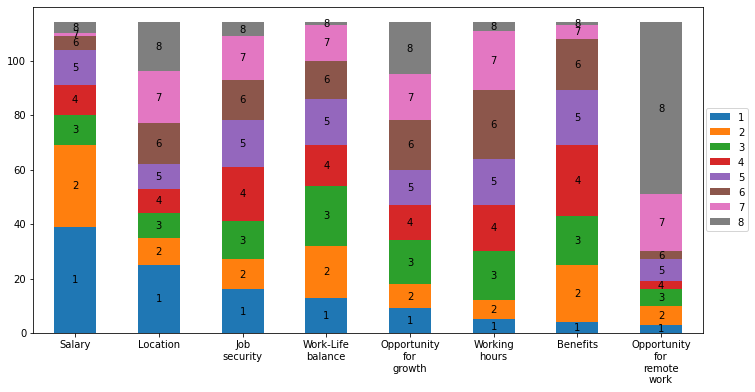

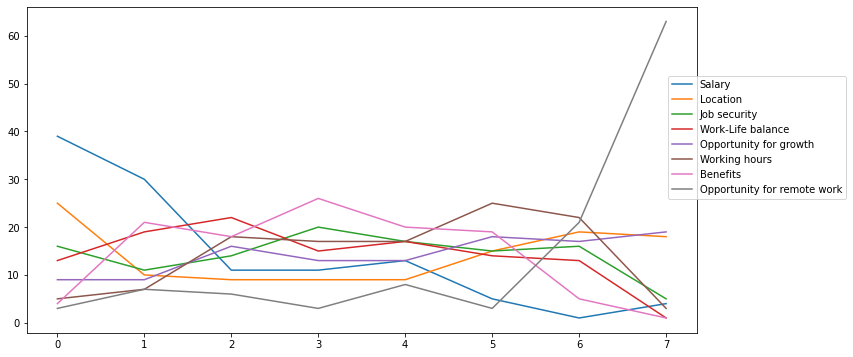

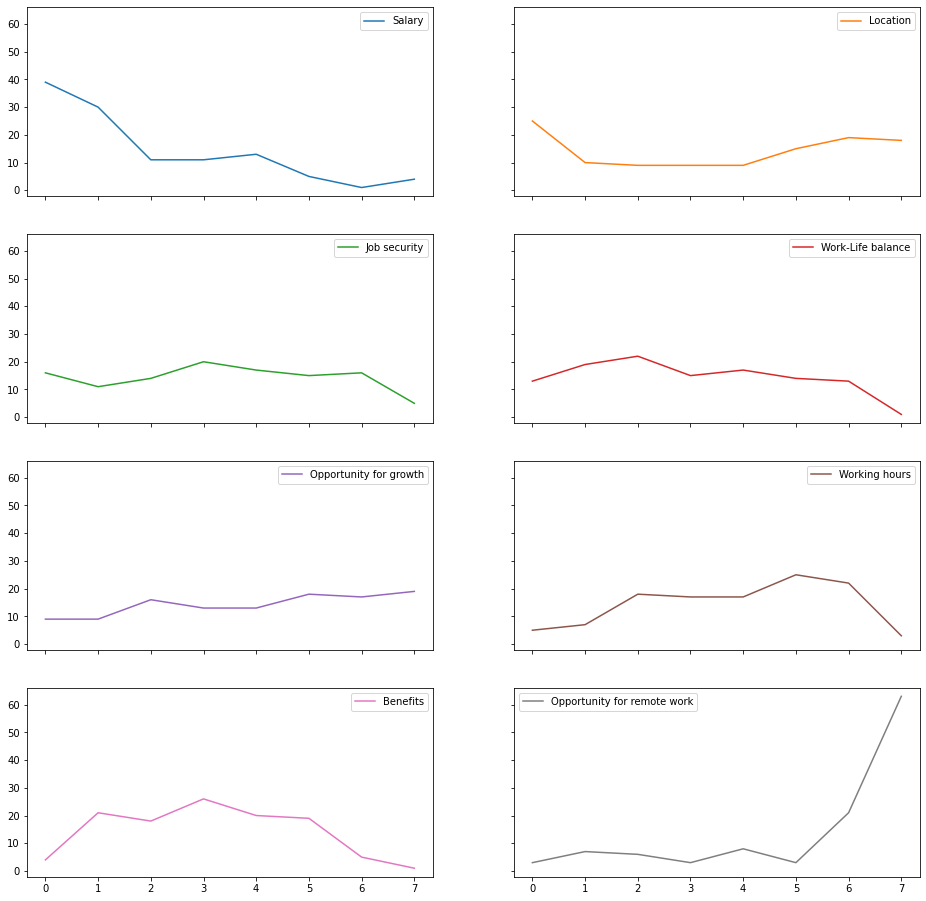

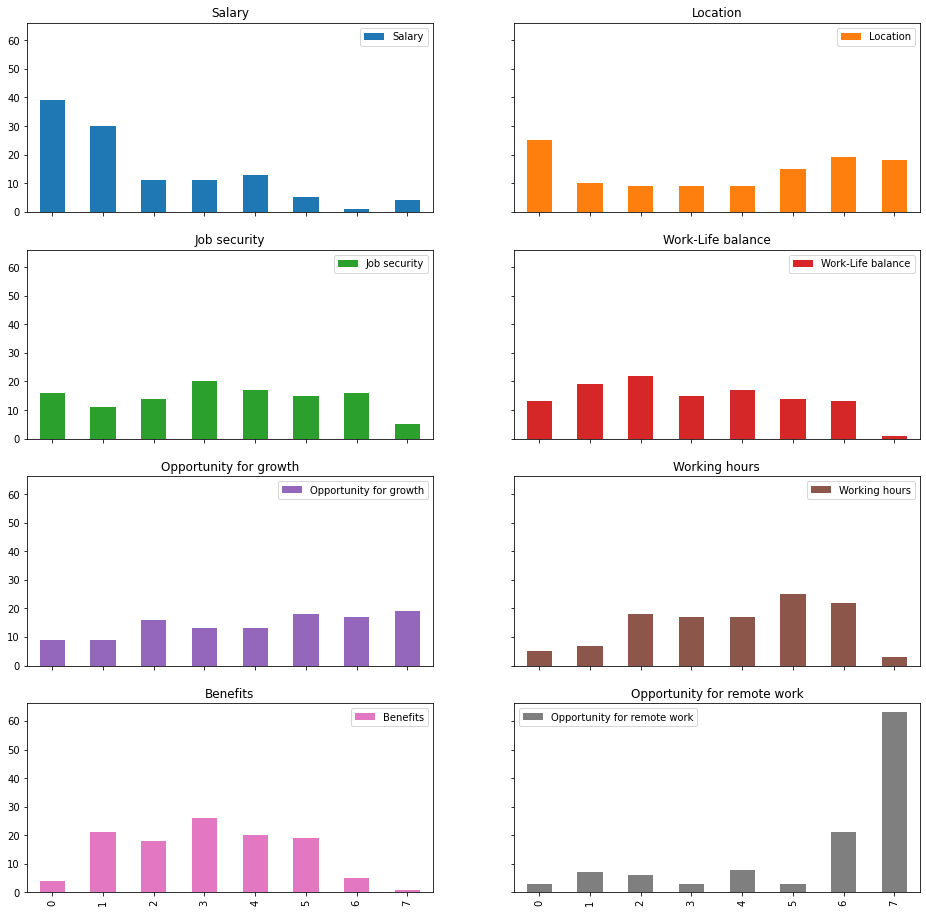

In [10]:
#Create a stacked bar chart showing distribution for each quality
ranked_qualities_barchart = ranked_qualities_df.transpose().plot(kind="bar", stacked=True, figsize=(12,6))
ranked_qualities_barchart.legend(range(1,9), loc="center right", bbox_to_anchor=(1.075, .5))
plt.xticks(ticks=plt.xticks()[0], labels=[x.replace(" ", "\n") for x in ranked_qualities_df.columns.values], rotation="horizontal")

for count, c in enumerate(ranked_qualities_barchart.containers, 1):
    ranked_qualities_barchart.bar_label(c, labels=[count]*8, label_type="center")

plt.show()

#Line chart
ranked_qualities_linechart = ranked_qualities_df.plot(figsize=(12,6))
ranked_qualities_linechart.legend(loc="center", bbox_to_anchor=(1.09, .6))
plt.show()

# Line subplots - note that salary is high at the beginning, indicating a frequent high ranking, while remote work is the opposite
ranked_qualities_linechart_subplots = ranked_qualities_df.plot(subplots=True, figsize=(16,16), layout=(4,2), sharey=True)
# Bar subplots - easier to see the lighter middle curves
ranked_qualities_barchart_subplots = ranked_qualities_df.plot(subplots=True, kind="bar", figsize=(16,16), sharey=True, layout=(4,2))

In [11]:
rank_qual_major_dict = {}

for response, category in zip(dvi[JOB_QUALITIES_RANKED], dvi[MAJOR_CATEGORY]):
    if category not in rank_qual_major_dict:
        rank_qual_major_dict[category] = {}
        for quality in response.split(";")[:-1]: rank_qual_major_dict[category][quality.strip()] = [0] * NUMBER_OF_QUALITIES
            
    for rank, quality in enumerate(response.split(";")[:-1]):
        rank_qual_major_dict[category][quality.strip()][rank] += 1

print("Major-Seperated Responses")
for major, dictionary in rank_qual_major_dict.items():
    print("Major: " + major)
    for category, values in dictionary.items():
        print("\t" + category + ": " + str(values))
    print()
    
for major, dictionary in rank_qual_major_dict.items():
    number_of_responses = sum(list(dictionary.values())[0])
    for l in dictionary.values():
        for i in range(len(l)):
            l[i] = l[i] / number_of_responses

print("Proportional Major-Seperated Responses")
for major, dictionary in rank_qual_major_dict.items():
    print("Major: " + major)
    for category, values in dictionary.items():
        print("\t" + category + ": " + str(values))
    print()

Major-Seperated Responses
Major: Computer/Math
	Opportunity for remote work: [2, 5, 2, 1, 3, 0, 6, 11]
	Salary: [9, 12, 1, 3, 2, 2, 1, 0]
	Opportunity for growth: [1, 2, 7, 3, 3, 1, 3, 10]
	Benefits: [2, 3, 8, 3, 6, 4, 3, 1]
	Job security: [6, 2, 3, 8, 2, 5, 3, 1]
	Work-Life balance: [3, 5, 5, 5, 5, 2, 5, 0]
	Working hours: [2, 0, 4, 5, 4, 11, 4, 0]
	Location: [5, 1, 0, 2, 5, 5, 5, 7]

Major: Health
	Work-Life balance: [2, 2, 3, 1, 1, 0, 0, 0]
	Location: [1, 1, 1, 0, 1, 1, 3, 1]
	Benefits: [1, 1, 2, 1, 2, 2, 0, 0]
	Salary: [2, 5, 0, 1, 0, 1, 0, 0]
	Job security: [2, 0, 0, 2, 1, 0, 3, 1]
	Opportunity for growth: [1, 0, 1, 1, 2, 3, 1, 0]
	Working hours: [0, 0, 2, 2, 2, 1, 2, 0]
	Opportunity for remote work: [0, 0, 0, 1, 0, 1, 0, 7]

Major: Engineering/Science
	Opportunity for growth: [3, 2, 1, 0, 1, 0, 0, 0]
	Job security: [0, 1, 1, 2, 2, 1, 0, 0]
	Location: [1, 1, 1, 1, 1, 0, 2, 0]
	Salary: [2, 1, 2, 1, 1, 0, 0, 0]
	Work-Life balance: [1, 1, 1, 1, 1, 1, 1, 0]
	Working hours: [0, 0, 0, 0

In [12]:
majors_dataframes = []
legend_list = []
qualities_list = sorted(rank_qual_major_dict["Business"].keys())
for major, d in rank_qual_major_dict.items():
    legend_list.append(major)
    majors_dataframes.append(pd.DataFrame(data=d).sort_index(axis=1))

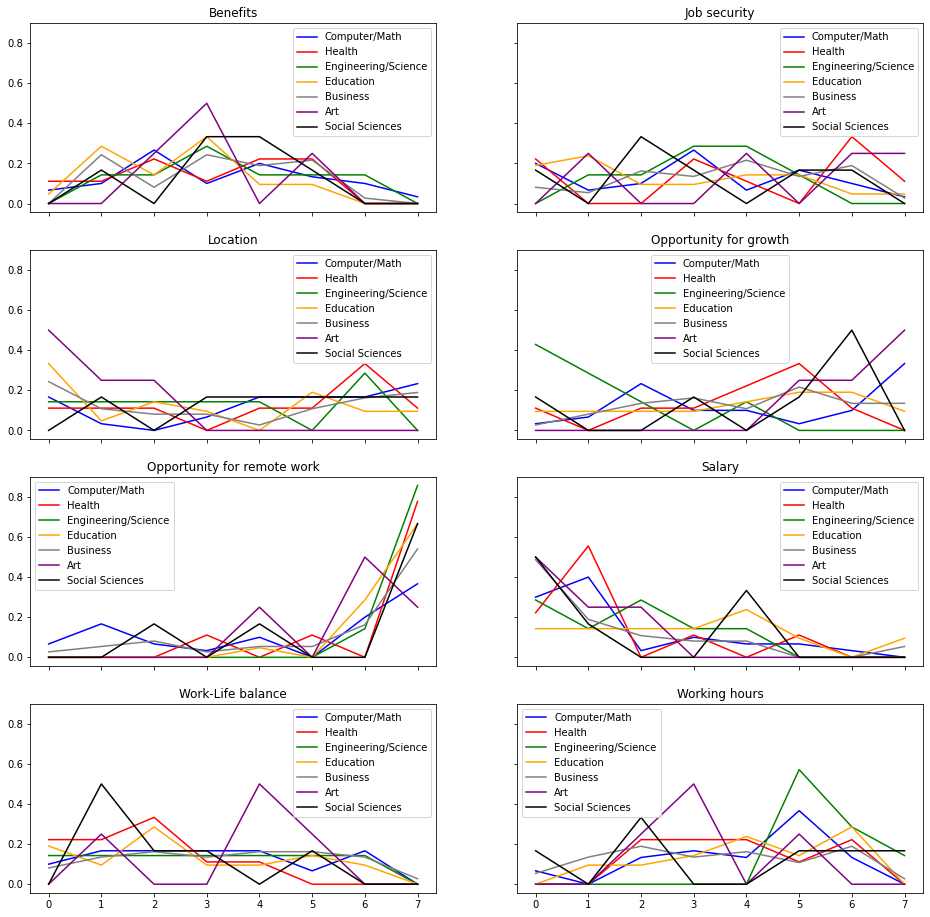

In [13]:
colors = ["blue", "red", "green", "orange", "gray", "purple", "black", "orange", "red", "red"]
ax = majors_dataframes[0].plot(color=colors[0], subplots=True, figsize=(16,16), layout=(4,2), sharey=True)
for num, x in enumerate(majors_dataframes[1:]): x.plot(color=colors[num+1], subplots=True, ax=ax)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i][j].legend(legend_list)
        ax[i][j].title.set_text(qualities_list[i*2+j])

Computer/Math : [0, 2, 5, 14, 9]
Health : [0, 1, 3, 5, 0]
Engineering/Science : [0, 0, 2, 5, 0]
Education : [0, 3, 17, 0, 1]
Business : [0, 0, 7, 21, 9]
Art : [0, 0, 3, 0, 1]
Social Sciences : [1, 0, 0, 3, 2]


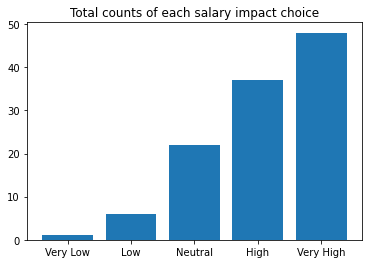

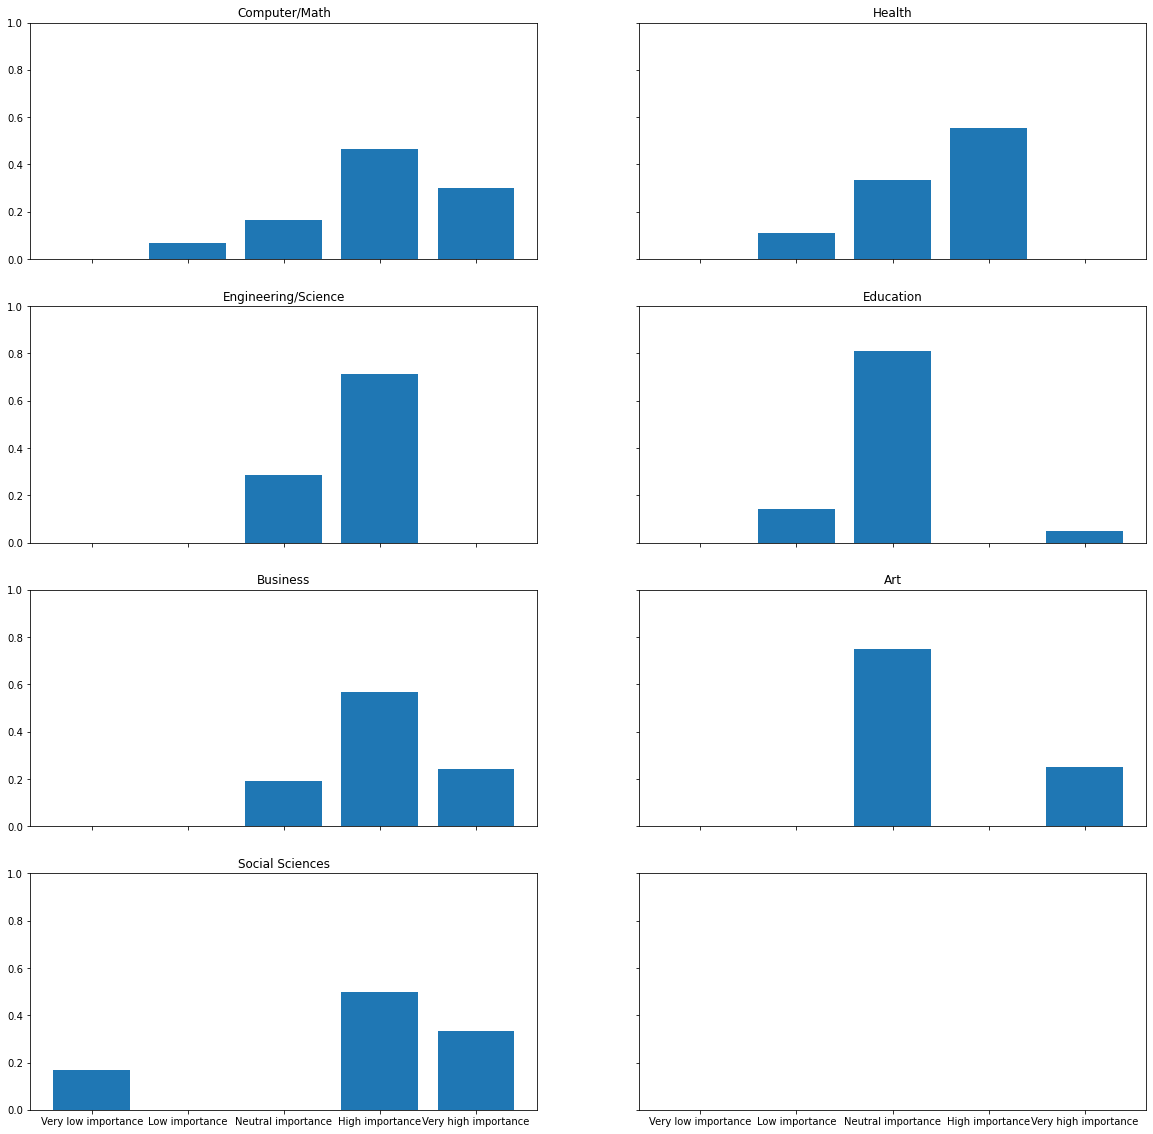

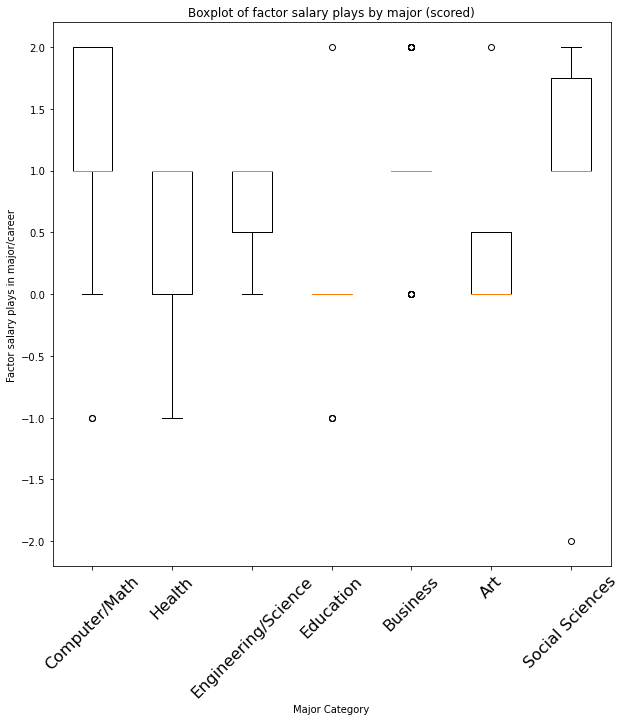

In [14]:
_, total_salary_factor_bar = plt.subplots()
total_salary_factor_bar.bar(["Very Low", "Low", "Neutral", "High", "Very High"],
                                  dvi[SALARY_FACTOR].value_counts()[::-1])
total_salary_factor_bar.set(title="Total counts of each salary impact choice")

factor_indices = {
    "Very low importance": 0,
    "Low importance": 1,
    "Neutral importance": 2,
    "High importance": 3,
    "Very high importance": 4,
}

sal_factor_major_dict = {}
# Dictionary will look like
# sal_factor_major_dict = {
#    "category_name": [num of very low responses,
#                      num of low responses,
#                      num of neutral responses,
#                      num of high responses,
#                      num of very high responses]
#}
#
# And then can be accessed via sal_factor_major_dict[categoryname][factor_indices[response]]

factor_score_major_dict = {}
# Dictionary will look like
# ex) 1 vlow, 2 low, 5 neutral, 6 high, 3 vhigh
# factor_score_major_dict = {
#     "category_name": [-2, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2]
#}

# Prep empty dictionaries
for factor, category in zip(dvi[SALARY_FACTOR], dvi[MAJOR_CATEGORY]):
    factor, category = factor.strip(), category.strip()
    if category not in sal_factor_major_dict:
        sal_factor_major_dict[category] = [0,0,0,0,0]
        factor_score_major_dict[category] = []
    sal_factor_major_dict[category][factor_indices[factor]] += 1
    
for k, v in sal_factor_major_dict.items(): print(k, ":", v)

_, sal_factor_subplots = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(20,20))
for num, (category, vallist) in enumerate(sal_factor_major_dict.items()):
    # Populate first dictionary
    vallist_sum = sum(vallist)
    sal_factor_subplots[num // 2, num % 2].bar(factor_indices.keys(), [x/vallist_sum for x in vallist])
    sal_factor_subplots[num // 2, num % 2].set_title(category)
    
    #Populate second dictionary
    for score, count in enumerate(vallist, -2):
        factor_score_major_dict[category] += [score] * count

plt.ylim(top=1)
plt.show()
_, factor_score_boxplot = plt.subplots(figsize=(10,10))
factor_score_boxplot.boxplot(factor_score_major_dict.values())
factor_score_boxplot.set(
    title='Boxplot of factor salary plays by major (scored)',
    xlabel='Major Category',
    ylabel='Factor salary plays in major/career',
)
factor_score_boxplot.set_xticklabels(factor_score_major_dict.keys(), rotation=45, fontsize=16)
plt.show()


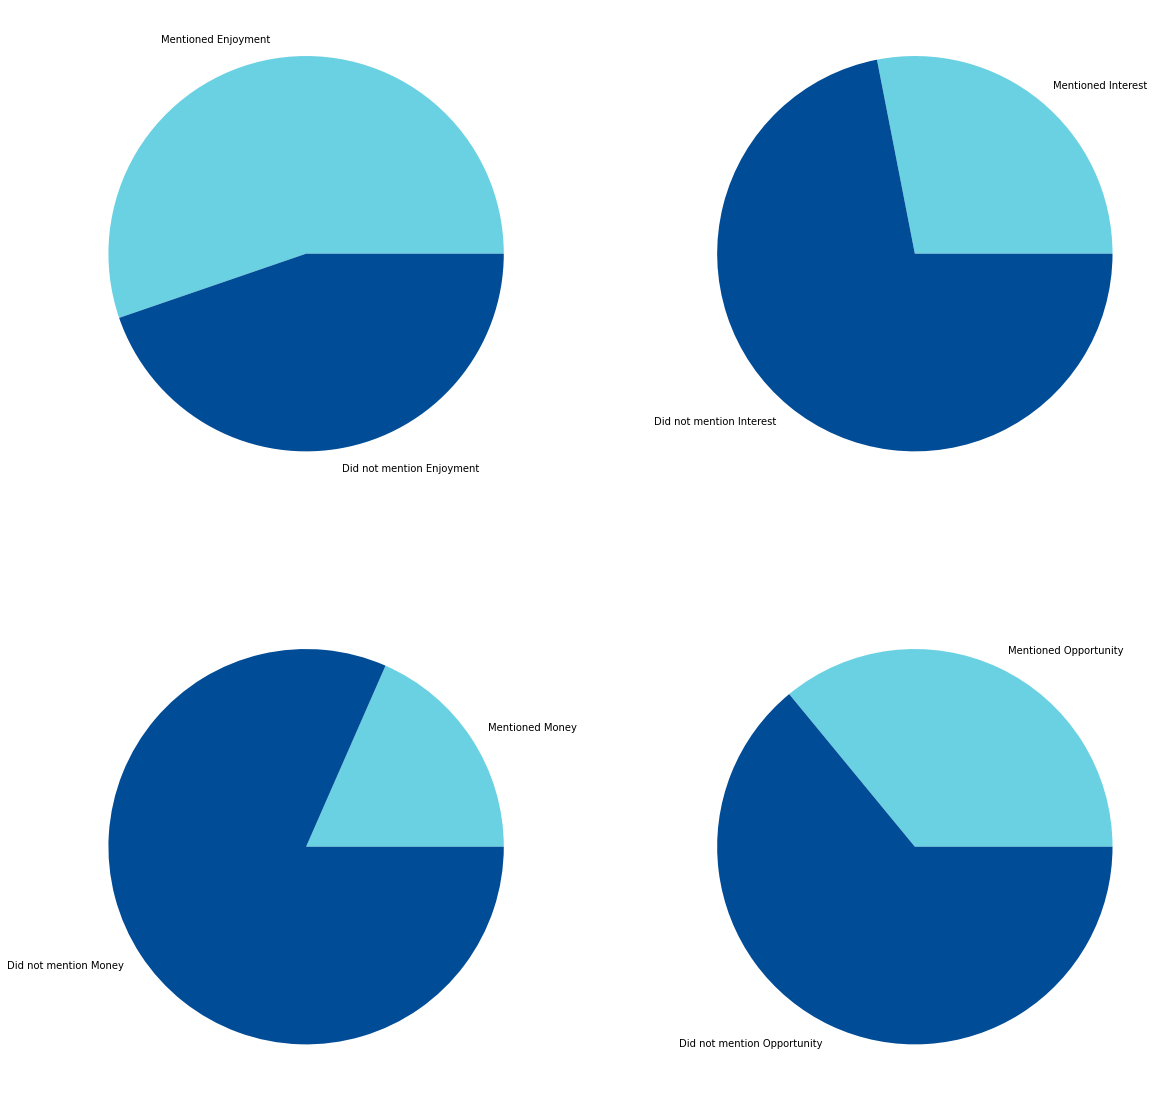

In [67]:
major_choice_reasons = {
    "Enjoyment": 0,
    "Interest": 0,
    "Money": 0,
    "Opportunity": 0,
    "Other": 0,
}
for response in dvi[MAJOR_CHOICE]:
    for reason in response.split(";"):
        major_choice_reasons[reason] += 1
        
_, major_choice_reasons_plots = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for chart, (reason, count) in enumerate(major_choice_reasons.items()):
    if reason == "Other": pass
    else:
        major_choice_reasons_plots[chart//2][chart%2].pie([count, NUMBER_OF_RESPONSES - count],
                                                          labels=[f"Mentioned {reason}", f"Did not mention {reason}"],
                                                          colors=EIU_COLORS[1::-1])

In [44]:
LIST_OF_REASONS = [
    "Enjoyment",
    "Interest",
    "Money",
    "Opportunity"
]

specified_reasons = {}
not_specified_reasons = {}
for reason in LIST_OF_REASONS:
    specified_reasons[reason] = [0,0,0,0,0]
    not_specified_reasons[reason] = [0,0,0,0,0]

for factor, reason in zip(dvi[SALARY_FACTOR], dvi[MAJOR_CHOICE]):
    factor = factor.strip()
    if reason == "Other": pass
    else: reason = set(reason.split(";"))
        
    for option in LIST_OF_REASONS:
        if option in reason:
            specified_reasons[option][factor_indices[factor]] += 1
        else:
            not_specified_reasons[option][factor_indices[factor]] += 1

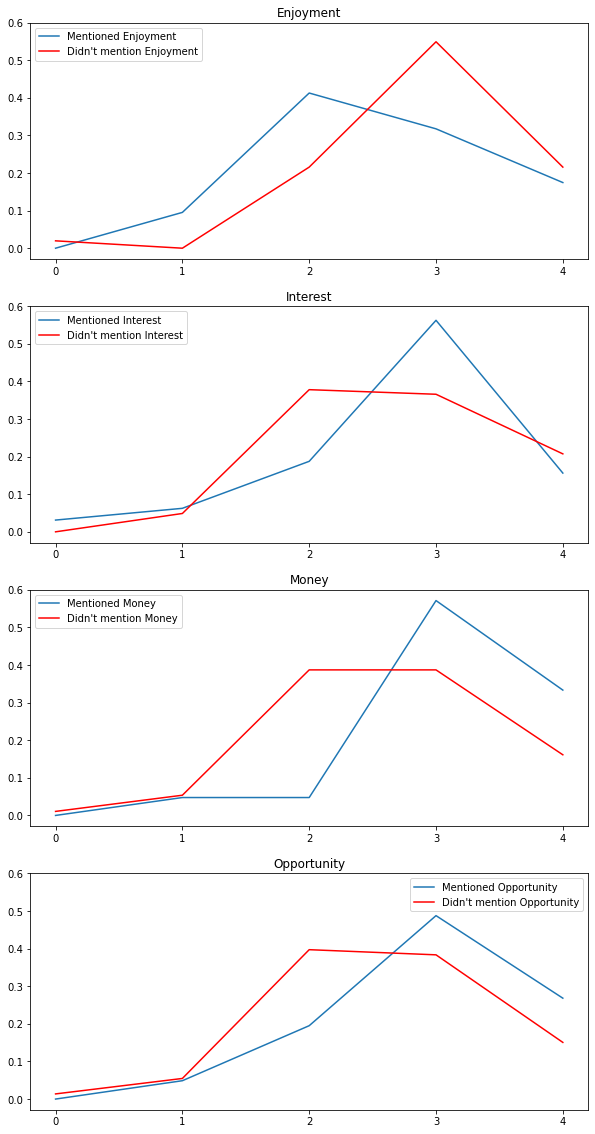

In [76]:
_, factor_major_choice_plot = plt.subplots(nrows=4, figsize=(10,20), sharey=True)
for num, reason in enumerate(LIST_OF_REASONS):
    factor_major_choice_plot[num].plot([x/sum(specified_reasons[reason]) for x in specified_reasons[reason]])
    factor_major_choice_plot[num].plot([x/sum(not_specified_reasons[reason]) for x in not_specified_reasons[reason]], color="red")
    factor_major_choice_plot[num].set_title(reason)
    factor_major_choice_plot[num].legend([f"Mentioned {reason}", f"Didn't mention {reason}"])
    factor_major_choice_plot[num].set_xticks(range(5))